# Example script

### This code is built to illustrate a typical execution of the 'main.py' script. The only difference is that we have included step-by-step explanation with plots to ease the understanding.

-------------------------------------------

### Loading packages and parameters

In [1]:
from PIL import Image
import PIL.ImageOps
import os

import matplotlib.pyplot as plt
from libs import utils

### Parameters

# Dots per inch (DPI) of raw image (resolution used to scan the droplet patterns)
dpi = 3200

# Desired width and height of final image in centimeters (side length of scanned squared area in the experiments)
length = 5.0

# Binary threshold used to binarize the images. 0.3 gives the most accurate results with our materials, but any other value can be used. 
binary_threshold = 0.3

# By default, the crop_raw function defined in libs/utils.py crops the center of the raw image, discarding the same amount of pixels on its left and right sides, as well as on its top and bottom sides.
# Sometimes, however, the cropped image contains details that are not desired. For example, the markers used as reference in our experiment paper sheets.
# These two parameters allow us to shift the region that will be cropped. They represent the number of pixels to shift the cropped image on the vertical and horizontal axis, i.e. on the downward and right directions.
# It is recommended to start with both parameters equal to 0, and adjust them accordingly only if neccesary. 
v_shift = 0
h_shift = 0

-----------------------
### Not using a Cloth material

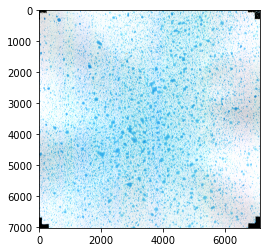

In [33]:
# raw image filename and extension
file = "ConfFree_Exp1_3200dpi"
ext = ".bmp"

# Defined if a CLOTH was used for this experiment
cloth = False

# Load raw image
raw = Image.open(os.path.join('input', file+ext))

# Plot raw image
plt.imshow(raw)

In [34]:
# Crop "raw" image to ensure it is 5x5 cm^2 (1 inch = 2.54 cm). Be sure no reference marks printed on the
# paper remain included inside the cropped image. Note that after cropping we keep the center of the 
# original image, i.e. borders are removed until specified dimensions are satisfied
rawcut = utils.crop_raw(raw, length, v_shift, h_shift, dpi)

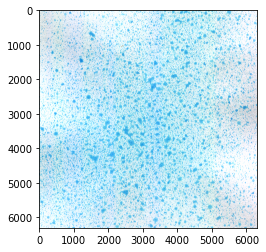

In [35]:
# Plot the cropped image
plt.imshow(rawcut)

In [36]:
# Negate "rawcut" image and take its first (red) component in RGB
# color space. As our stains are blue and background is white, this
# component gives the best contrast between stains and background. In
# case of using another color for stains and/or background, select the
# component that maximizes the contrast between them.
rawneg = PIL.ImageOps.invert(rawcut)
rawnegred, _, _ = rawneg.split()

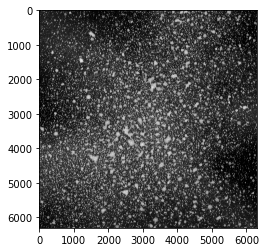

In [37]:
# Plot the negated red-scaled image using a gray-scale 
plt.imshow(rawnegred, cmap='gray')

In [38]:
# Binarize the image using the parameter binary_threshold. All values below or equal are converted to 1 and above to 0.

# With the point() function we are able to map each pixel through a function. 
# In our case we use it for the binarization of the image.  
binary = rawnegred.point(lambda p: 1 if p >= (binary_threshold*255) else 0)

# The values of the binarized image are converted to the 0-255 scale for being saved on a file.
output = binary.point(lambda p: p*255)
output.save(os.path.join('output', 'Binary_' + file + ext))

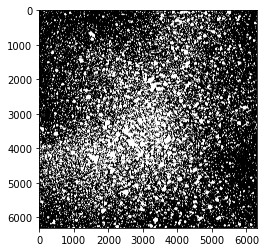

In [39]:
# Plot the binarized image in gray-scale
plt.imshow(binary, cmap='gray')

In [40]:
# the parameter pnos should contain the pixel mean values of all CONFFREE experiments previously made
pnos = [0.309129, 0.291286, 0.270232, 0.269421]

utils.get_results(cloth, binary, pnos)

pno:  0.3091796007505633


------------------------
### Using a Cloth material

In [2]:
# raw image filename and extension
file = "TelaAzul_Conf1_Exp1_3200dpi"
ext = ".bmp"

# Load raw image
raw = Image.open(os.path.join('input', file+ext))

# Plot raw image
plt.imshow(raw)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\TelaAzul_Conf1_Exp1_3200dpi.bmp'

In [42]:
# Crop "raw" image to ensure it is 5x5 cm^2 (1 inch = 2.54 cm). Be sure no reference marks printed on the
# paper remain included inside the cropped image. Note that after cropping we keep the center of the 
# original image, i.e. borders are removed until specified dimensions are satisfied
rawcut = utils.crop_raw(raw, length, v_shift, h_shift, dpi)


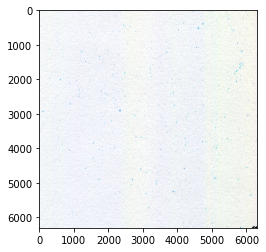

In [43]:
# Plot the cropped image
plt.imshow(rawcut)

In [44]:
# Negate "rawcut" image and take its first (red) component in RGB
# color space. As our stains are blue and background is white, this
# component gives the best contrast between stains and background. In
# case of using another color for stains and/or background, select the
# component that maximizes the contrast between them.
rawneg = PIL.ImageOps.invert(rawcut)
rawnegred, _, _ = rawneg.split()

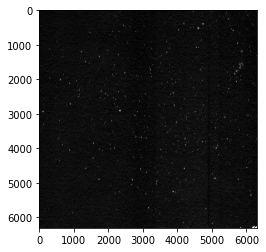

In [45]:
# Plot the negated red-scaled image using a gray-scale 
plt.imshow(rawnegred, cmap='gray')

In [46]:
# Binarize the image using the parameter binary_threshold. All values below or equal are converted to 1 and above to 0.

# With the point() function we are able to map each pixel through a function. 
# In our case we use it for the binarization of the image.  
binary = rawnegred.point(lambda p: 1 if p >= (binary_threshold*255) else 0)

# The values of the binarized image are converted to the 0-255 scale for being saved on a file.
output = binary.point(lambda p: p*255)
output.save(os.path.join('output', 'Binary_' + file + ext))

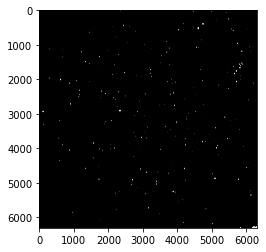

In [47]:
# Plot the binarized image in gray-scale
plt.imshow(binary, cmap='gray')

In [48]:
# the parameter pnos should contain the pixel mean values of all CONFFREE experiments previously made
pnos = [0.309129, 0.291286, 0.270232, 0.269421]

utils.get_results(cloth, binary, pnos)

po: 0.0024547222737698973
<meanpno>: 0.28501699999999996
BBC: 99.13874531211475 %
